In [1]:
import os
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'autoreduce_frontend.autoreduce_webapp.settings')
import django
from django.conf import settings as dj_settings

from autoreduce_qp.autoreduce_django.settings import DATABASES, INSTALLED_APPS

dj_settings.configure(DATABASES=DATABASES, INSTALLED_APPS=INSTALLED_APPS)
django.setup()

In [2]:
from autoreduce_db.reduction_viewer.models import ReductionRun
from plotly import graph_objects as go

In [4]:
runs = ReductionRun.objects.all()

In [8]:
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
x = [run.created for run in runs]

In [44]:
x = x[767:]

In [13]:
from datetime import timedelta

In [47]:
day_interval = []
x_iterator = iter(x)
for date in x_iterator:
    next_day = next(x_iterator)
    while next_day - date < timedelta(days=1):
        next_day = next(x_iterator)
        
    day_interval.append(date)

StopIteration: 

In [53]:
x_day = []
y_count = []
for day in day_interval:
    x_day.append(day)
    y_count.append(runs.filter(created__lte=day).count())

In [98]:
import numpy as np
y_count = np.array(y_count)- 780

In [99]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_day, y=y_count))
fig.update_layout(title='Runs processed over days of cycle', width=800, height=500, xaxis_title="Day", yaxis_title="Runs")
fig.show()

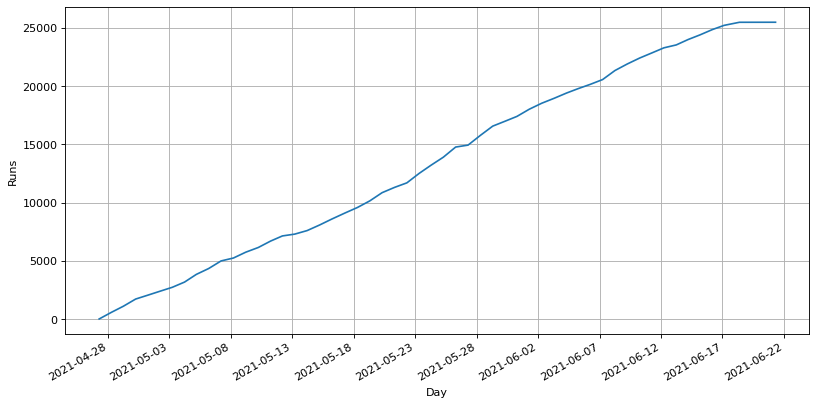

In [100]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(x_day, y_count)
plt.xlabel("Day")
plt.ylabel("Runs")
plt.gcf().autofmt_xdate()
plt.grid()

plt.show()